In [28]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [29]:
# load in data
wg_ls = []
for length in range(1,6):
    file_name = "Meander_Z_" + str(length) + ".csv"
    wg_dat = np.loadtxt(open(file_name, "rb"), delimiter=",", skiprows=9)
    wg_ls.append(wg_dat)
wg_arr = np.asarray(wg_ls)

C:\luceda\ipkiss_330\python\envs\ipkiss3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log10
C:\luceda\ipkiss_330\python\envs\ipkiss3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in log10


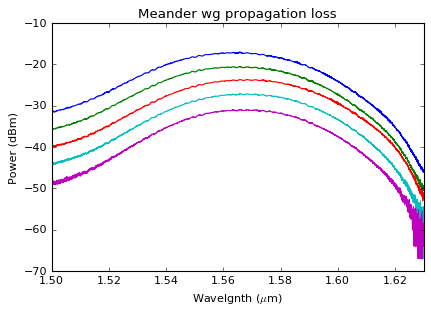

In [30]:
## Take arrays of wavelengths and power separately
power_ls = []
wavelength_ls = []
for wg in wg_arr:
    power = wg[:, 1]
    wavelength = wg[:, 0]
    power_ls.append(power)
    wavelength_ls.append(wavelength)
power_arr = np.asarray(power_ls)
wavelength_arr = np.asarray(wavelength_ls)

plt.plot()
for i, (pwr, wl) in enumerate(zip(power_arr, wavelength_arr)):
    plt.plot(wl*1e6, 10*np.log10(pwr*1000))
#     print pwr[4020]
plt.title("Meander wg propagation loss")
plt.xlabel("Wavelgnth ($\mu$m)")
plt.ylabel("Power (dBm)")
plt.xlim(1.5, 1.63)
plt.legend()
plt.show()

In [31]:
## Find out the point of maximum power in the dataset and its index
power_max_ls = []
idx_of_max_ls = []
wl_of_max_ls = []
for i , (pwr, wl) in enumerate(zip(power_arr, wavelength_arr)):
    power_max = np.amax(pwr)
    power_max_ls.append(power_max)
    index_of_max = pwr.argmax()
    idx_of_max_ls.append(index_of_max)
    wavelength_of_max = wl[index_of_max]
    wl_of_max_ls.append(wavelength_of_max)
    print "Wg"+str(i)
    print "Point of maximum power: [wavelength, power] = [{0} nm, {1} W]".format(wavelength_of_max, power_max)
    print "Index of the point corresponding to maximum power: {0}".format(index_of_max)
    
power_max_arr = np.asarray(power_max_ls)
idx_of_max_arr = np.asarray(idx_of_max_ls)
wl_of_max_arr = np.asarray(wl_of_max_ls)

print idx_of_max_arr[0:4]


wl_near_peak_ls = []
power_near_peak_ls = []
power_avg_ls = []
range_size = 1000


Wg0
Point of maximum power: [wavelength, power] = [1.5655925e-06 nm, 1.96801775019e-05 W]
Index of the point corresponding to maximum power: 5778
Wg1
Point of maximum power: [wavelength, power] = [1.5655527e-06 nm, 8.86171437742e-06 W]
Index of the point corresponding to maximum power: 5776
Wg2
Point of maximum power: [wavelength, power] = [1.568195e-06 nm, 4.27821305493e-06 W]
Index of the point corresponding to maximum power: 5908
Wg3
Point of maximum power: [wavelength, power] = [1.5657345e-06 nm, 1.94482299776e-06 W]
Index of the point corresponding to maximum power: 5785
Wg4
Point of maximum power: [wavelength, power] = [1.5658541e-06 nm, 8.08537549801e-07 W]
Index of the point corresponding to maximum power: 5791
[5778 5776 5908 5785]


Spiral0
Wavelengths range of interest (near max): 1.5220232e-06nm to1.5260255e-06nm
Average Power = 1.88440663715e-05 W
Spiral1
Wavelengths range of interest (near max): 1.5220238e-06nm to1.5260258e-06nm
Average Power = 8.51133827837e-06 W
Spiral2
Wavelengths range of interest (near max): 1.522024e-06nm to1.5260261e-06nm
Average Power = 4.14262791764e-06 W
Spiral3
Wavelengths range of interest (near max): 1.5220242e-06nm to1.5260262e-06nm
Average Power = 1.87228116602e-06 W
Spiral4
Wavelengths range of interest (near max): 1.5220245e-06nm to1.5260266e-06nm
Average Power = 7.75153561676e-07 W
[-17.24825375 -20.70002148 -23.82724072 -27.27628931 -31.10612253]


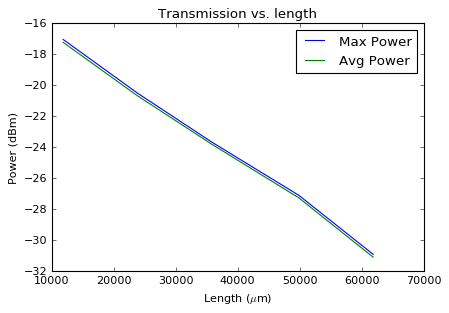

In [32]:
output = file("WgArray_Power_Avg.txt","w")
for k , (pwr, wl) in enumerate(zip(power_arr, wavelength_arr)):
    wl_near_peak = wl[5700 : 5900]
    wl_near_peak_ls.append(wl_near_peak)
    power_near_peak = pwr[5700 : 5900]
    power_near_peak_ls.append(power_near_peak)
    power_avg = np.mean(power_near_peak)
    power_avg_ls.append(power_avg)
    print "Spiral"+str(k)
    print "Wavelengths range of interest (near max): {0}nm to{1}nm".format(wl[3600], wl[3800])
    print "Average Power = {0} W".format(power_avg)
    print >>output, power_avg
    
wl_near_peak_arr = np.asarray(wl_near_peak_ls)
power_near_peak_arr = np.asarray(power_near_peak_ls)
power_avg_arr = np.asarray(power_avg_ls)

length_arr = np.array([6000 + 5654 + 200, 18000+ 5654 + 200, 30000+ 5654 + 200, 44000+ 5654 + 200, 56000+ 5654 + 200]) #Bending length 3*2*pi*R=5654, horizontal straight length = 3*60+20=200

power_dBm_max_arr = 10*np.log10(1000*power_max_arr)
power_dBm_avg_arr = 10*np.log10(1000*power_avg_arr)
print power_dBm_avg_arr
## Power Transmission vs. length
plt.plot()
plt.plot(length_arr, power_dBm_max_arr, label='Max Power')
plt.plot(length_arr, power_dBm_avg_arr, label='Avg Power')
plt.title("Transmission vs. length")
plt.xlabel("Length ($\mu$m)")
plt.ylabel("Power (dBm)")
plt.legend()
plt.show()

loss per length unit:  
-2.72 dB/cm
 
-0.000272 x - 14.06
[-17.2861581  -20.55007461 -23.81399113 -27.62189372 -30.88581024]


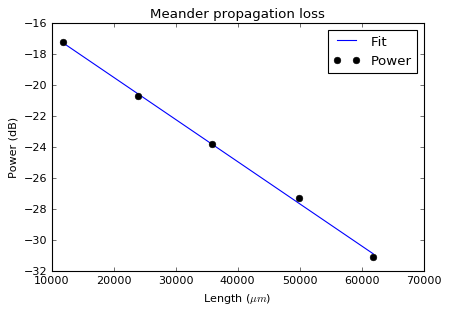

In [33]:
z1 = np.polyfit(length_arr, power_dBm_avg_arr, 1)
f_avg = np.poly1d(z1)
slope1 = np.polyder(f_avg,1)
slope_cm = slope1*1e04 #convert into loss per cm unit
#print f_avg
print "loss per length unit: {0} dB/cm".format(slope_cm)


print f_avg
print f_avg(length_arr)
x = length_arr
y_fit = f_avg(length_arr)
y_power = power_dBm_avg_arr

plt.plot(x,y_fit, label = "Fit")
plt.plot(x,y_power, 'ko', label = "Power")
plt.title("Meander propagation loss")
plt.xlabel("Length ($\mu m$)")
plt.ylabel("Power (dB)")
plt.legend()
plt.savefig("MeanderWgPropagationLoss.png")
plt.show()
plt.close()